<a href="https://colab.research.google.com/github/vimalkumarmdb/A-novel-SVM-kNN-PSO-Ensemble-method-for-intrusion-detection-system-/blob/master/SoftComputing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied Soft Computing

In [0]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Kdd/kdd1/Kdd cup.zip", 'r')
zip_ref.extractall()
zip_ref.close()

# ## python command for zip
### from zipfile import ZipFile
### file = 'Kdd cup.zip'
### with ZipFile(file,'r') as Zip:
###   Zip.extractall()
###   print('Done')


In [0]:
import pandas as pd
import seaborn as sn
import numpy as np

In [0]:
feature_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [0]:
df = pd.read_csv('Kdd cup/kddcup1.csv',names = feature_names)

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


# **Data** **Cleaning**

In [0]:
mydf = df
def remove_duplicate(mydf):
  print('Before remove duplicate shape',mydf.shape)
  mydf.drop_duplicates(subset=None, keep='first', inplace=True)
  print('After remove duplicate shape',mydf.shape)
  return mydf

In [0]:
df = remove_duplicate(mydf)

Before remove duplicate shape (4898431, 42)
After remove duplicate shape (1074992, 42)


## Find cateogorical features

In [0]:
columns_names = df.columns
print('columns_names :\n',columns_names)
df_num = df._get_numeric_data().columns
print('Numerical attribute:\n',df_num)
cateogory = list(set(columns_names) - set(df_num))
print("Categorical attribute:\n",cateogory)


columns_names :
 Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')
Numerical attribute:
 Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_log

## Transform categorical into numerical

In [0]:
def cat_into_num(df):
  df['protocol_type'] = df['protocol_type'].astype('category')
  df['service'] = df['service'].astype('category')
  df['flag'] = df['flag'].astype('category')
  cat_columns = df.select_dtypes(['category']).columns
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
  return df

In [0]:
df = cat_into_num(df)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,24,9,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,24,9,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [0]:
def count_label(df):
  my_label =df['label'].value_counts()
  return my_label

In [0]:
my_label = count_label(df)
print(my_label)

normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64


In [0]:
#!pip install 'matplotlib == 3.1.1'

In [0]:
import matplotlib.pyplot as plt
def barplot_label(my_label):
  plt.figure(figsize=(12,10))
  plt.title('Distribution of attacks')
  my_label.apply(np.log).plot.bar(stacked=False)
  plt.xlabel("labels")
  plt.ylabel("log(count)")
  plt.show()

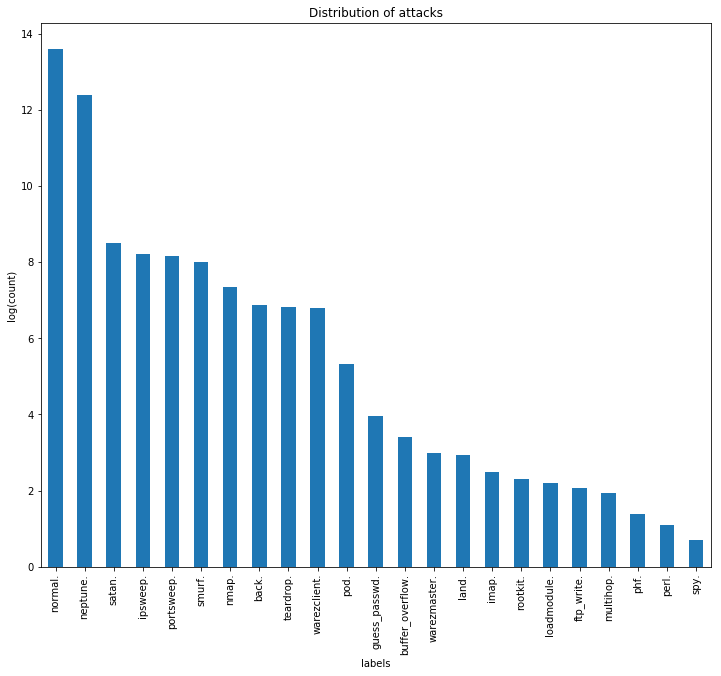

In [0]:
barplot_label(my_label)

In [0]:
#!pip install 'pandas-profiling>=2.3'

In [0]:
df.to_csv('my_kdd_data',index=False)

# Load Zip data from derive

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/clean_kdd_data/Clean_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

## load all dataset

In [0]:
def load_all_data():
  data1_df = pd.read_csv('Clean data/data1.csv')
  data2_df = pd.read_csv('Clean data/data2.csv')
  data3_df = pd.read_csv('Clean data/data3.csv')
  data4_df = pd.read_csv('Clean data/data4.csv')
  data5_df = pd.read_csv('Clean data/data5.csv')
  return data1_df,data2_df,data3_df,data4_df,data5_df

In [0]:
data1_df,data2_df,data3_df,data4_df,data5_df = load_all_data()

In [0]:
data1_df.head().shape

(5, 43)

In [0]:
def drop_one_feature(data1_df):
  my_df = data1_df.iloc[0:,1:43]
  return my_df

In [0]:
my_df1 = drop_one_feature(data1_df)
my_df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,24,9,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,1,24,9,238,1282,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
2,0,1,24,9,239,1295,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12,12,1.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,normal.
3,0,1,24,9,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,14,14,1.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,normal.
4,0,1,24,9,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15,15,1.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,normal.


In [0]:
my_df1.shape

(215547, 42)

# Exploratory data analysis using pandas profiling

In [0]:
import pandas_profiling 
%matplotlib inline

In [0]:
my_df1.copy()
my_df2 = remove_duplicate(my_df1)

Before remove duplicate shape (215547, 42)
After remove duplicate shape (215547, 42)


In [0]:
def pd_profile_report(my_df1):
  pfr = pandas_profiling.ProfileReport(my_df1,correlation_threshold = 0.5,
                                     bins = 20)
  pfr.to_file("Analysis_report.html")
  return pfr

In [0]:
ppr = pd_profile_report(my_df2)

In [0]:
feature = ppr.get_rejected_variables(threshold=0.5)
feature

['dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'logged_in',
 'num_root',
 'same_srv_rate',
 'serror_rate',
 'srv_rerror_rate',
 'srv_serror_rate',
 'su_attempted']

In [0]:
my_df2.copy()
def drop_feature(df,feature):
  df1 = df
  df1 = df1.drop(feature,axis=1)
  return df1

In [0]:
my_df3 = drop_feature(my_df2,feature)
my_df3.shape,my_df2.shape

((215547, 28), (215547, 42))

## After drop some feature

In [0]:
ppr1 = pd_profile_report(my_df3)

In [0]:
feature = ppr1.get_rejected_variables(threshold=0.5)
feature

[]

In [0]:
cons_varibale =  ['is_host_login','num_outbound_cmds']
feature = cons_varibale
feature

['is_host_login', 'num_outbound_cmds']

In [0]:
my_df4 = drop_feature(my_df3,feature)
my_df4.shape,my_df3.shape

((215547, 26), (215547, 28))

In [0]:
my_df5 = remove_duplicate(my_df4)

Before remove duplicate shape (215547, 26)
After remove duplicate shape (199428, 26)


## After remove constabr feature

In [0]:
ppr2 = pd_profile_report(my_df5)

In [0]:
rejcted_feature = ppr2.get_rejected_variables(threshold=0.5)
rejcted_feature 

['dst_host_same_src_port_rate']

In [0]:
my_df6 = drop_feature(my_df5,rejcted_feature )

In [0]:
my_df6 = remove_duplicate(my_df6)

Before remove duplicate shape (199428, 25)
After remove duplicate shape (197852, 25)


In [0]:
ppr3 = pd_profile_report(my_df6)

In [0]:
feature = ppr3.get_rejected_variables(threshold=0.5)
feature

[]

# Principal Component Analysis

In [0]:
def check_data_variation(my_df6):
  for i in my_df6:
    sn.distplot(my_df6[i],bins=30,hist=True)
    plt.grid()
    plt.show()

In [0]:
target = my_df6.iloc[0:,24:25]
target.head()

,label
0,normal.
1,normal.
2,normal.
3,normal.
4,normal.


In [0]:
my_feature = my_df6.iloc[0:,0:24]
my_feature.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,count,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,0,1,24,9,215,45076,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0,0.0,0.0
1,0,1,24,9,238,1282,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,5,0.0,0.0
2,0,1,24,9,239,1295,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,12,0.0,0.0
3,0,1,24,9,236,1228,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,14,0.0,0.0
4,0,1,24,9,233,2032,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,15,0.0,0.0


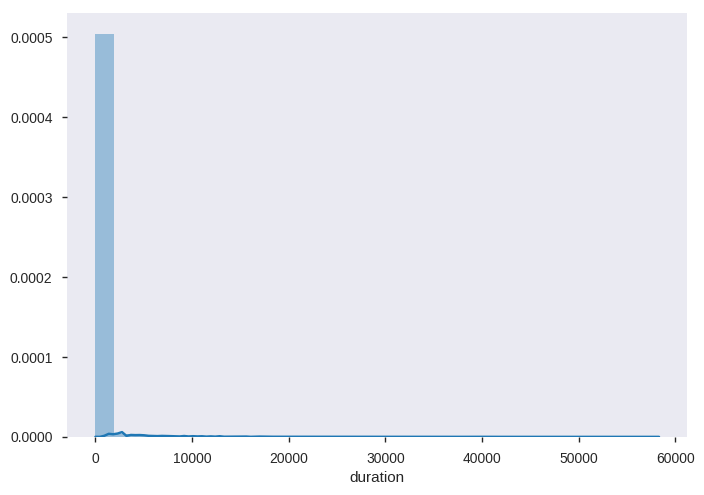

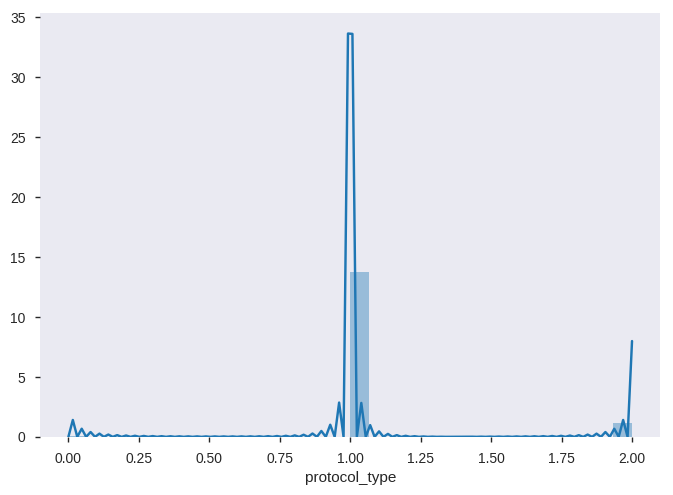

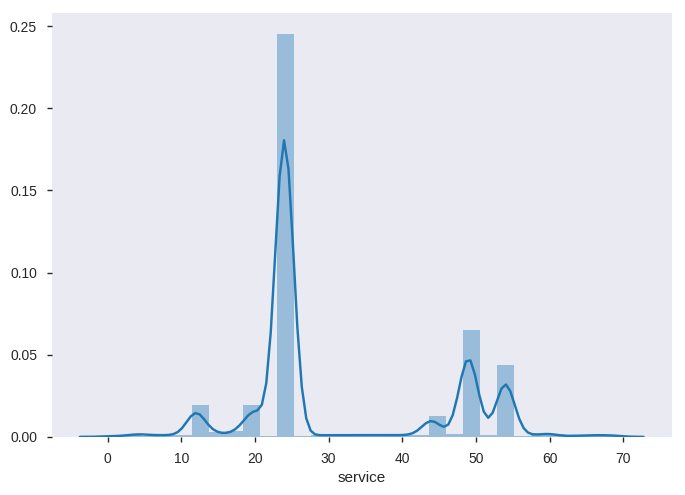

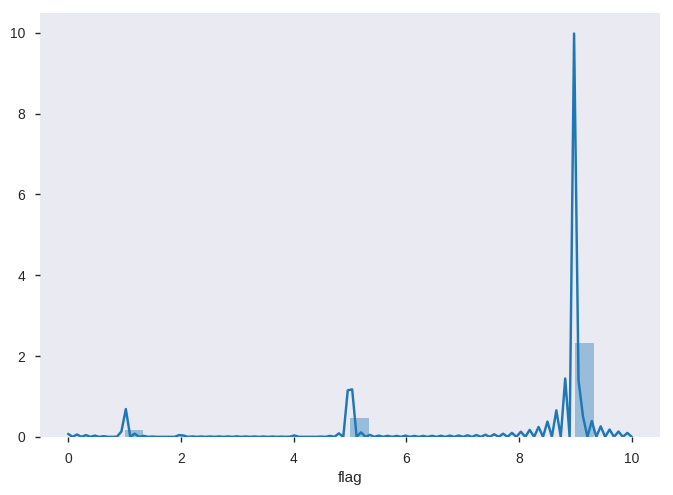

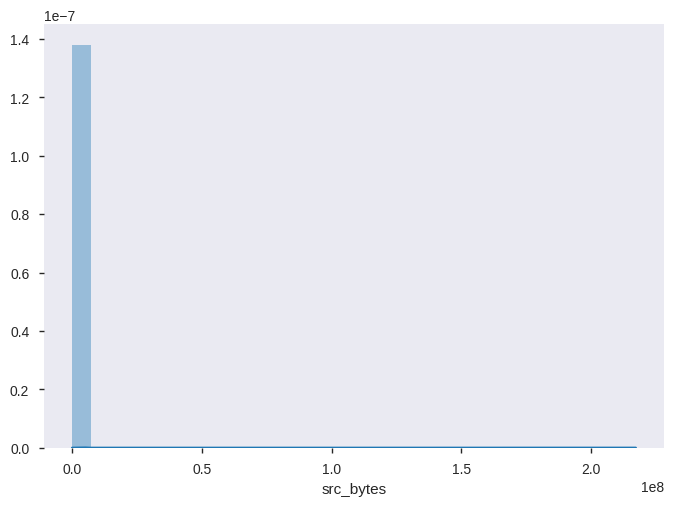

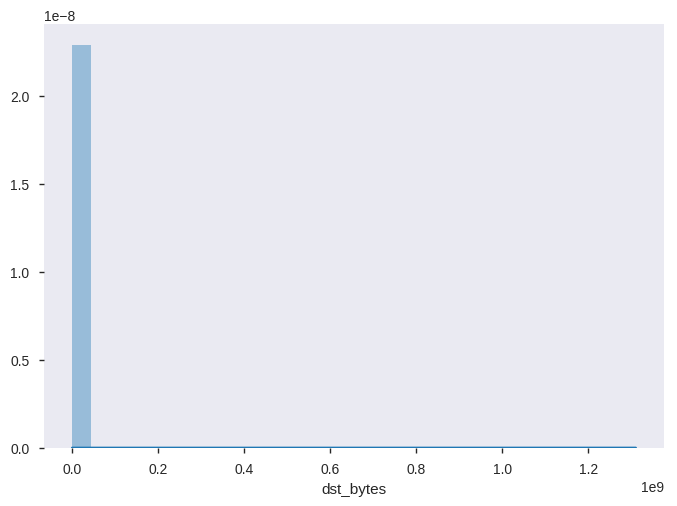

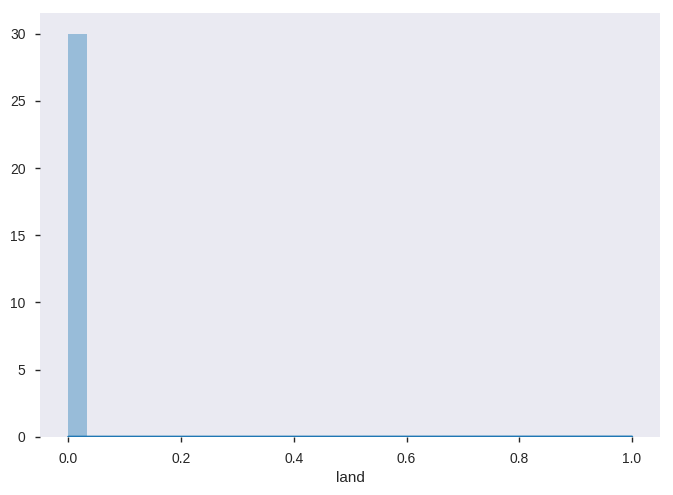

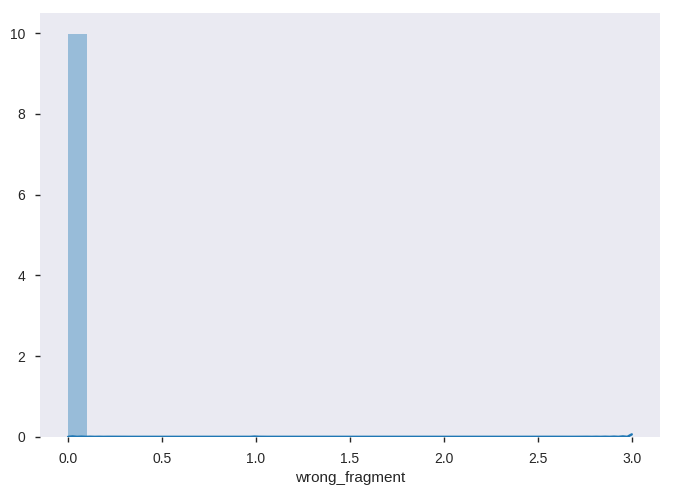

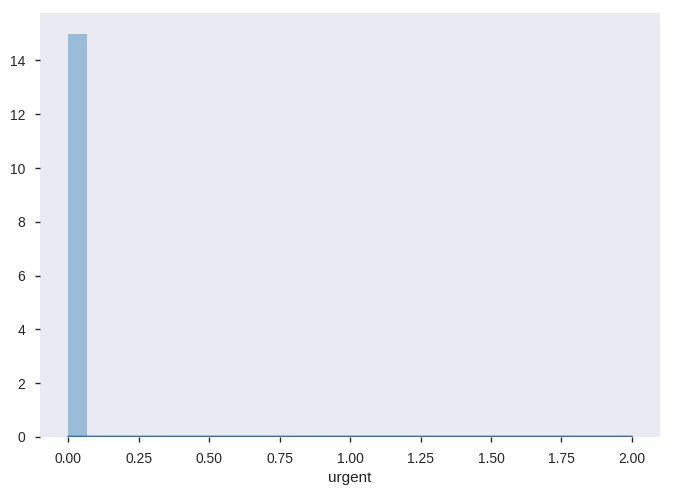

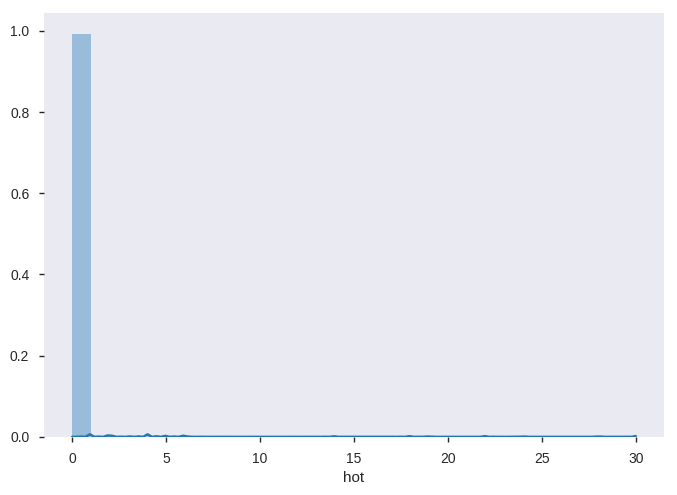

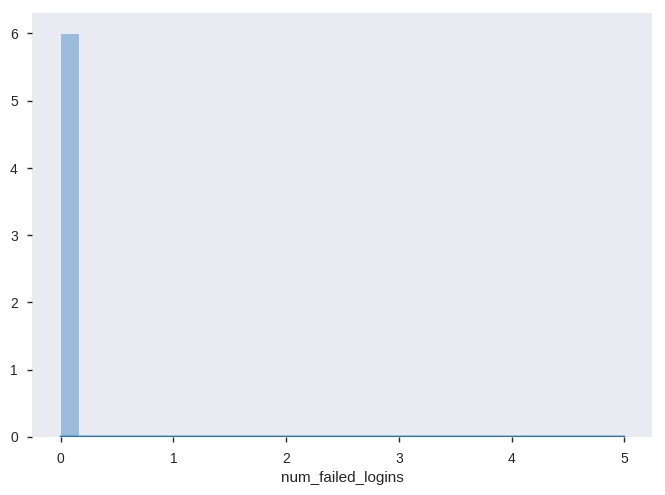

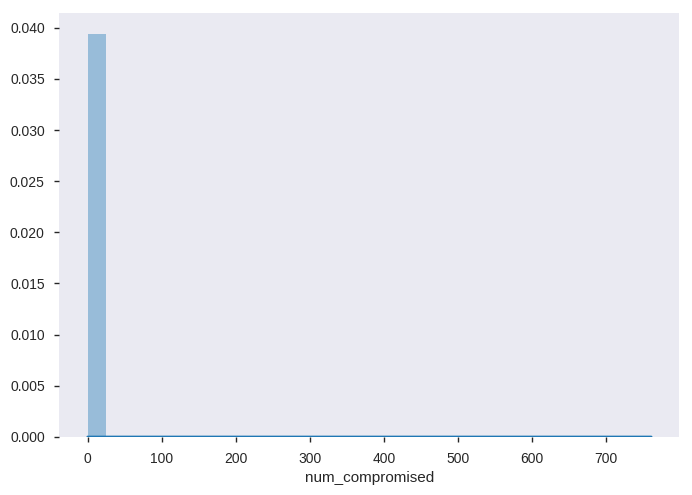

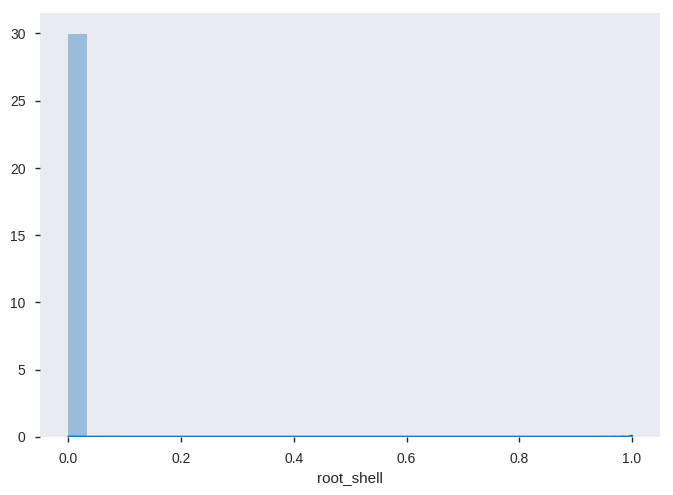

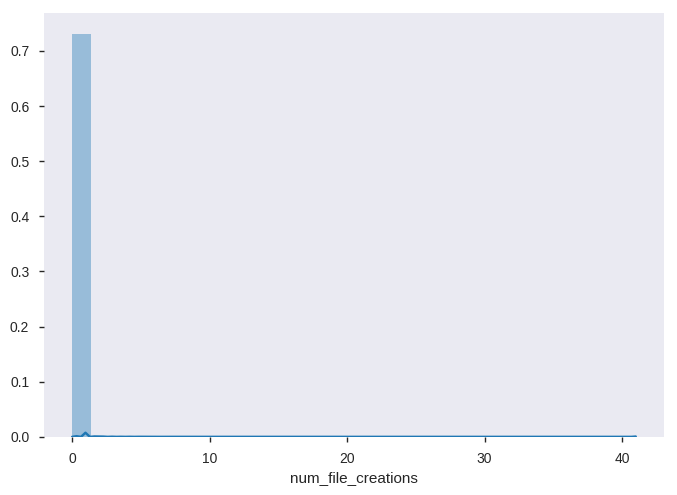

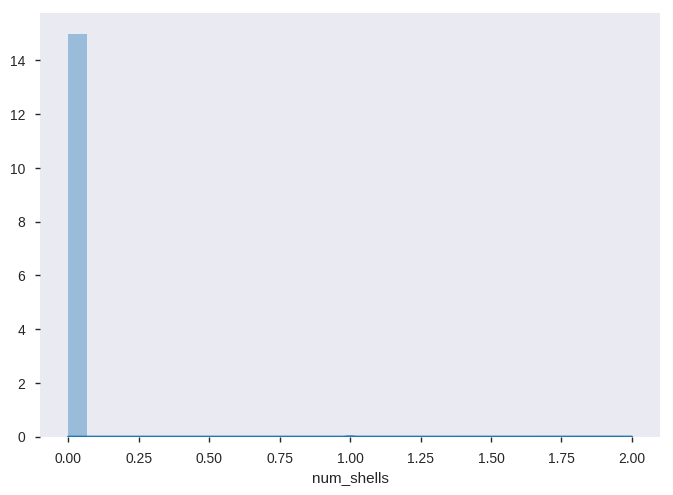

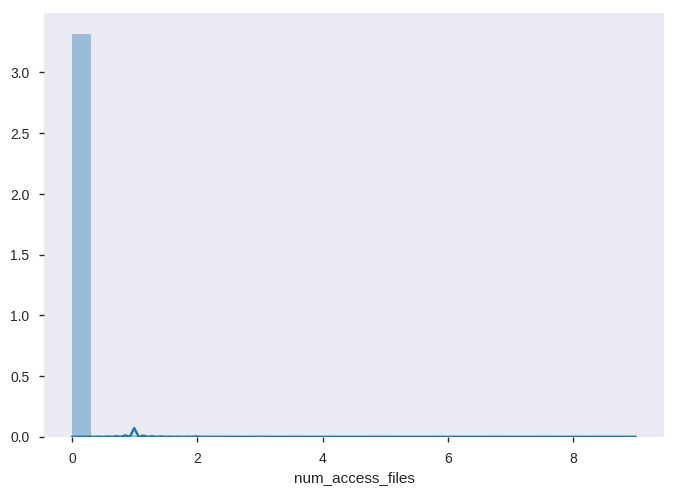

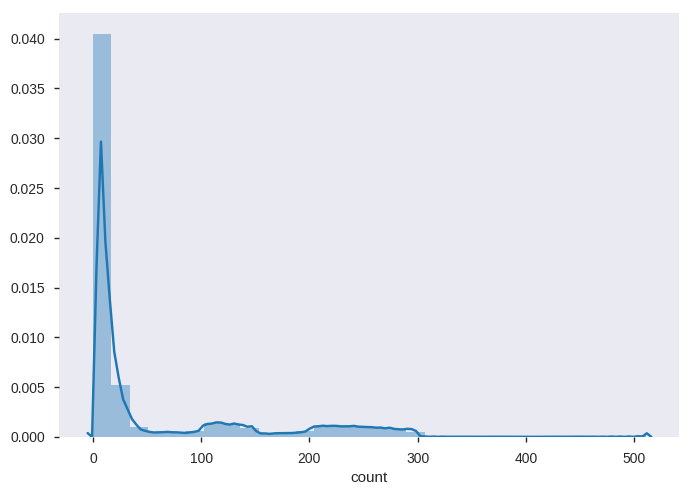

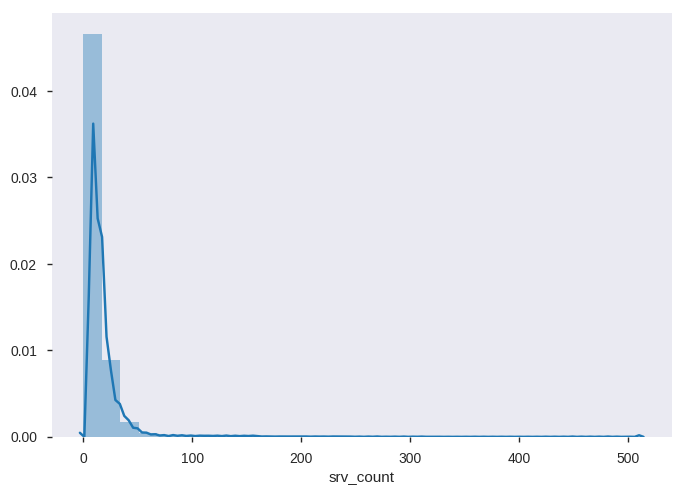

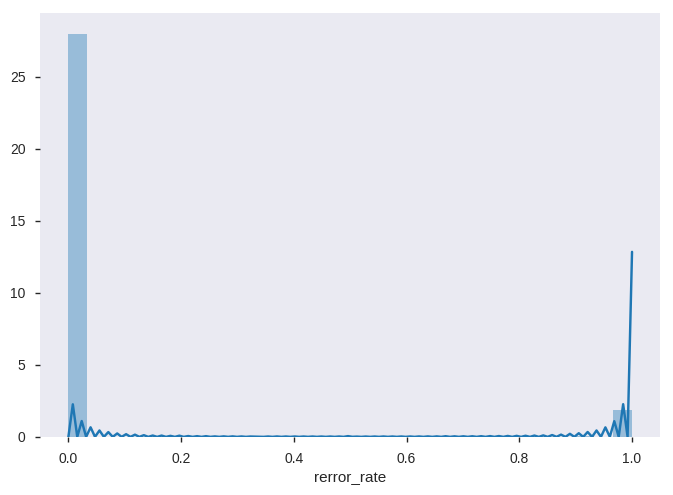

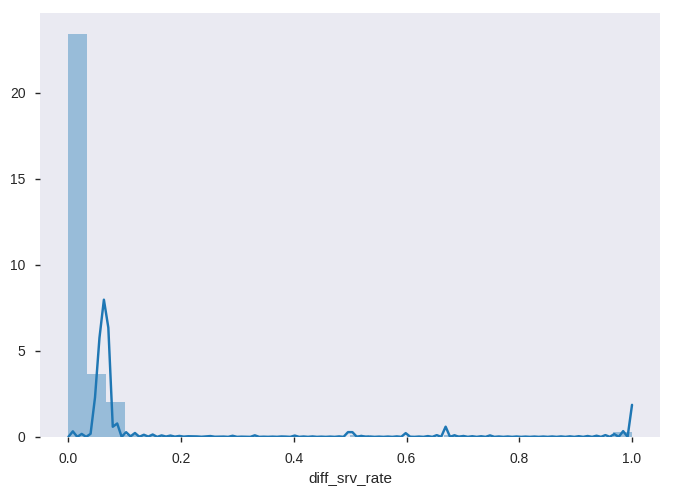

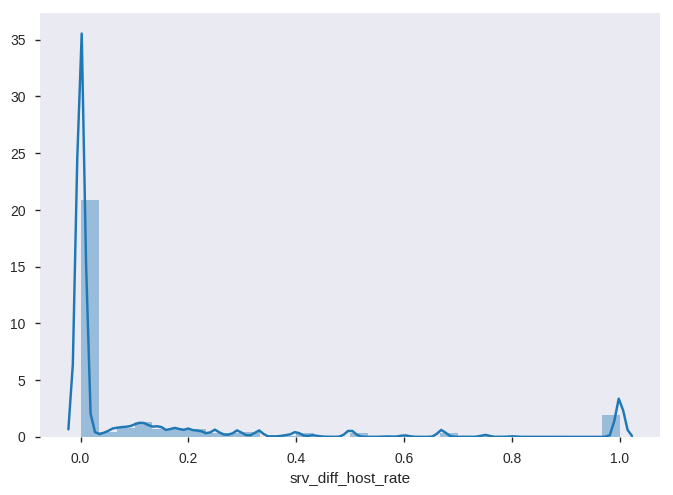

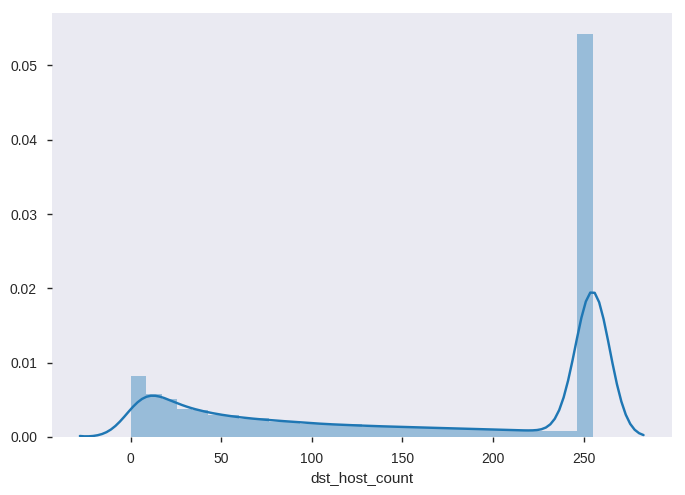

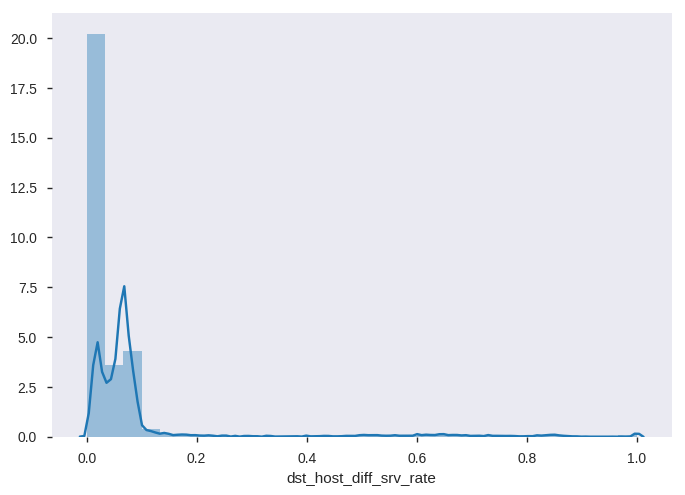

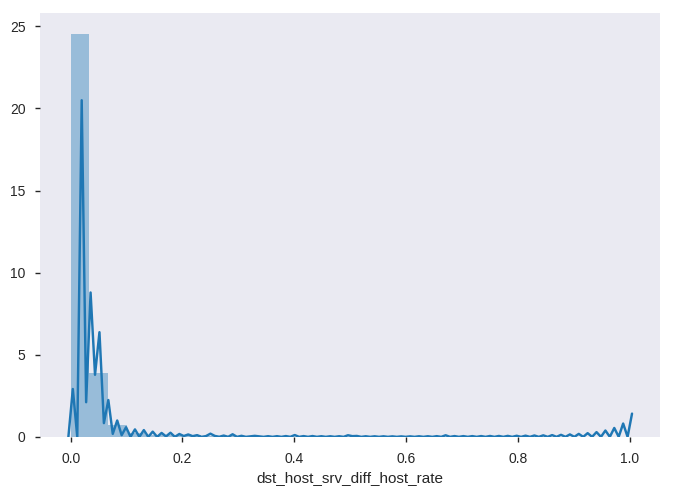

In [0]:
check_data_variation(my_feature)

In [0]:
def gausina_normal(my_df6):
  mean = my_df6.mean()
  std = my_df6.std()
  norm_df = (my_df6-mean)/std
  print("After normalize,Plot of every feature",check_data_variation(norm_df))
  return norm_df

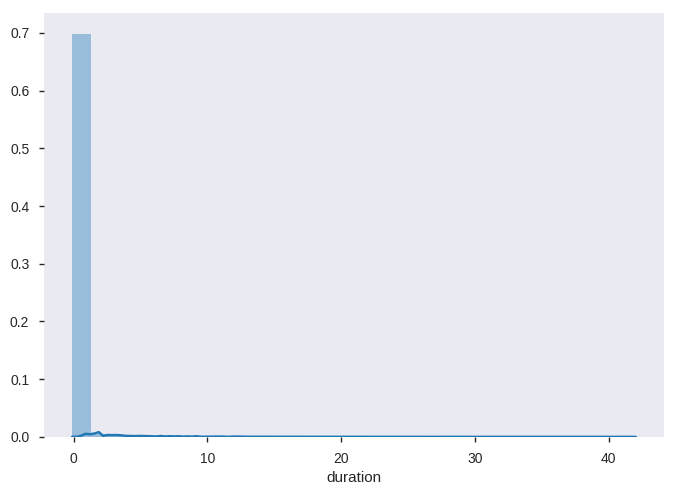

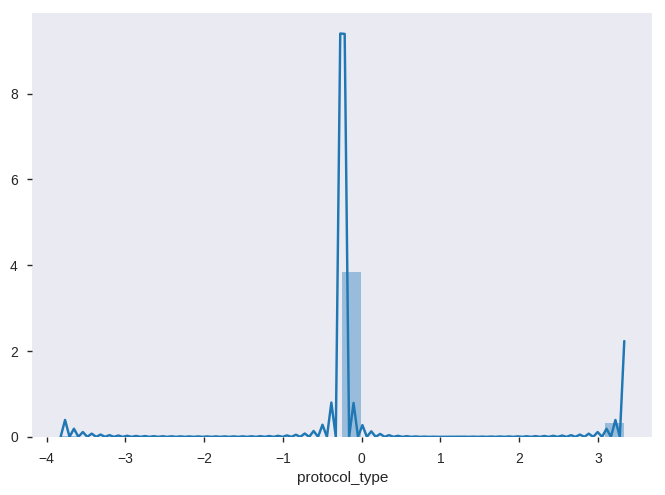

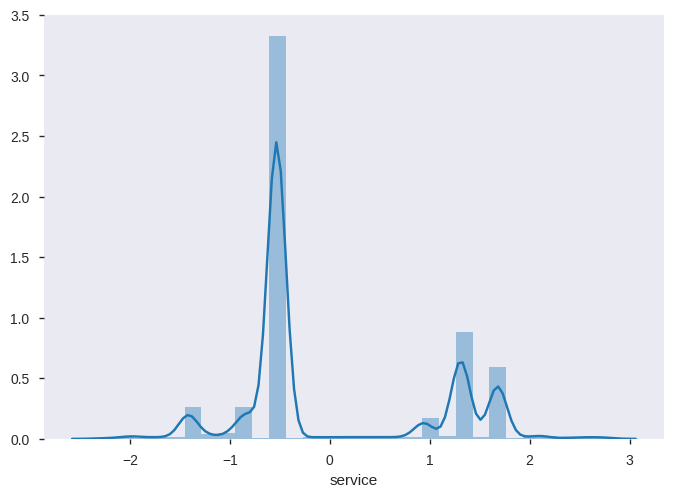

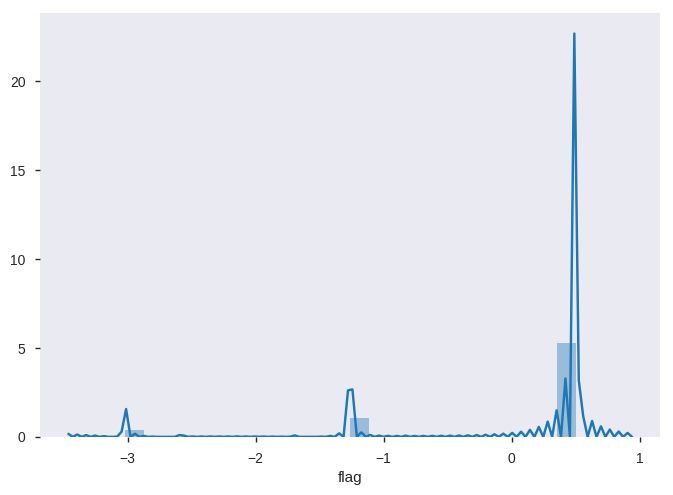

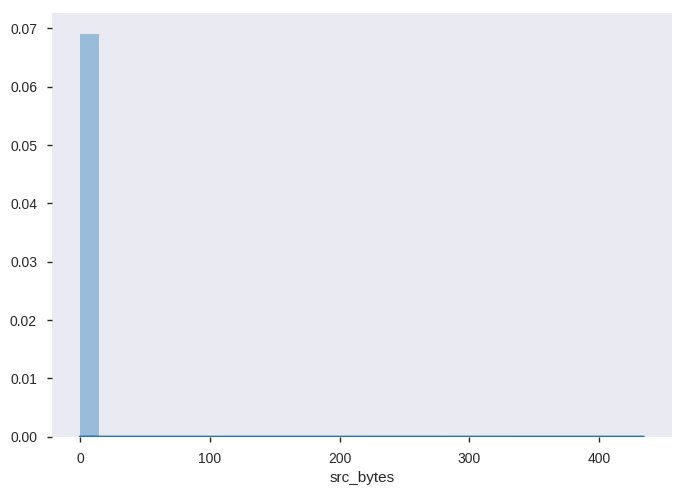

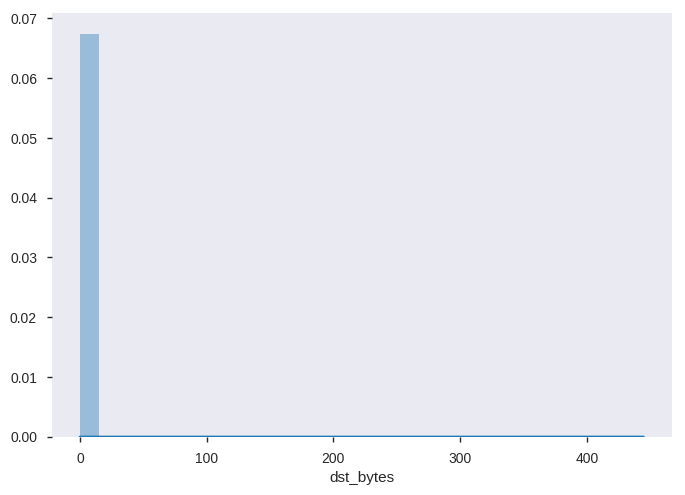

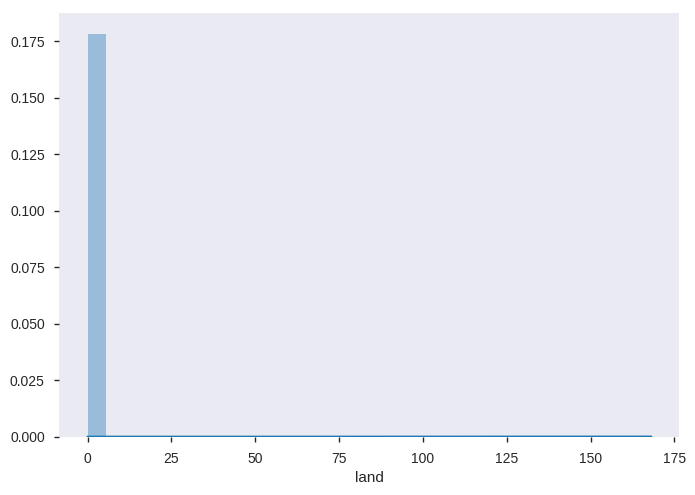

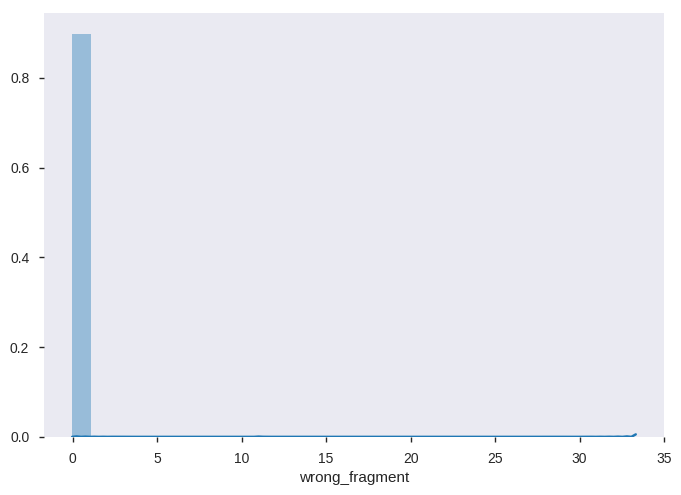

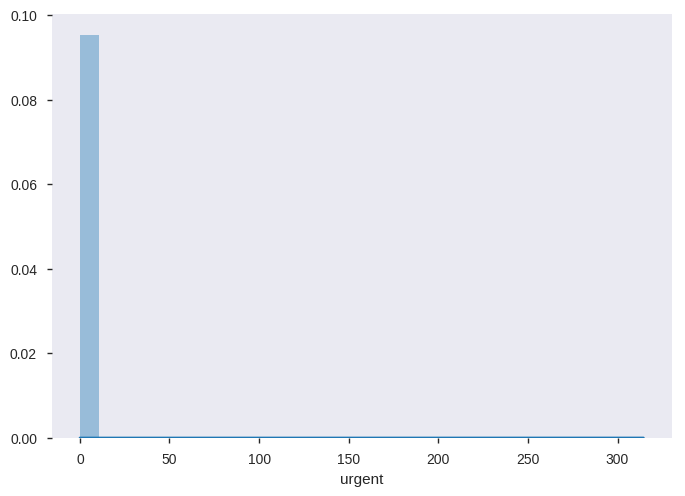

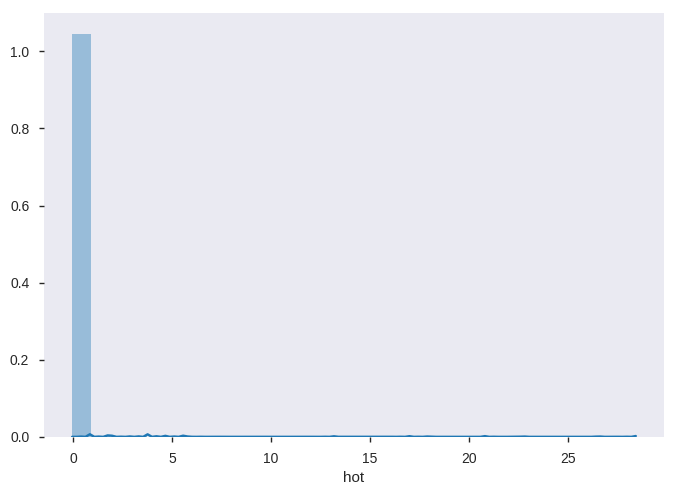

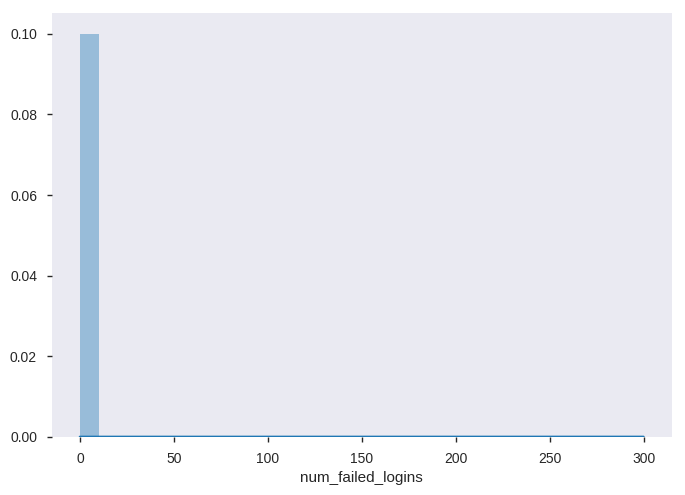

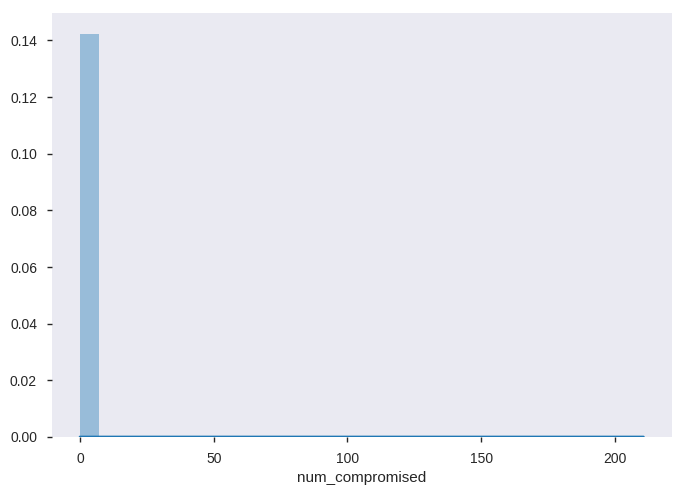

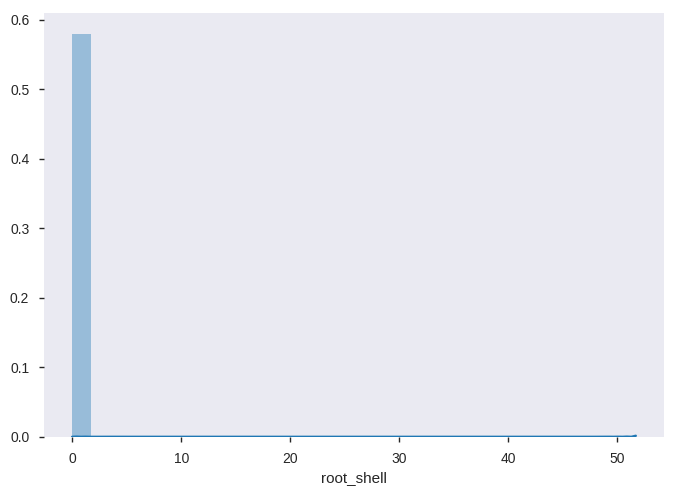

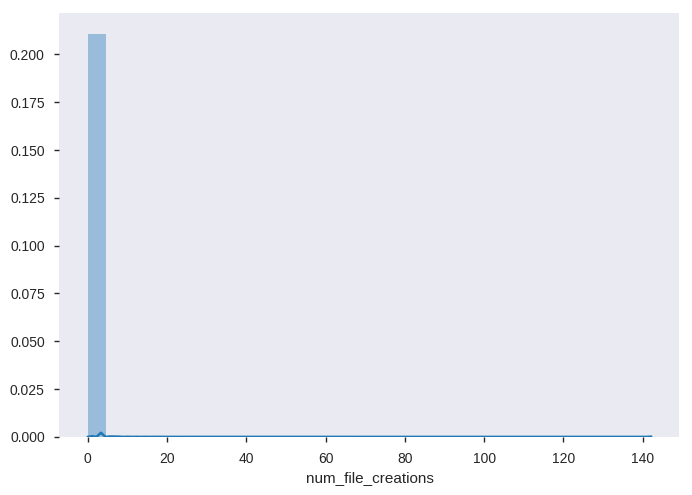

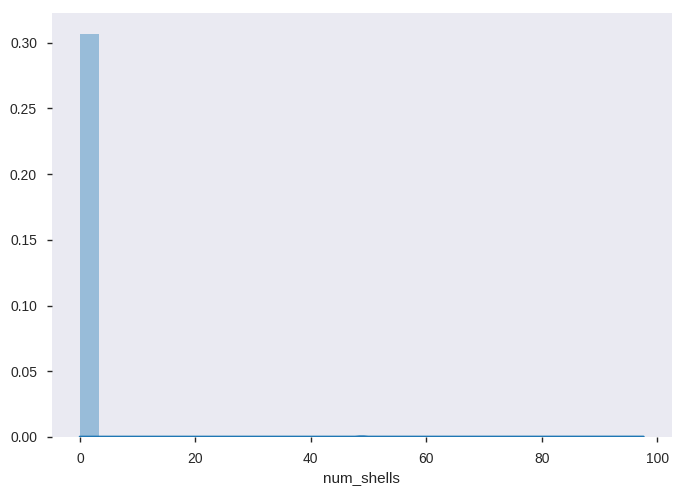

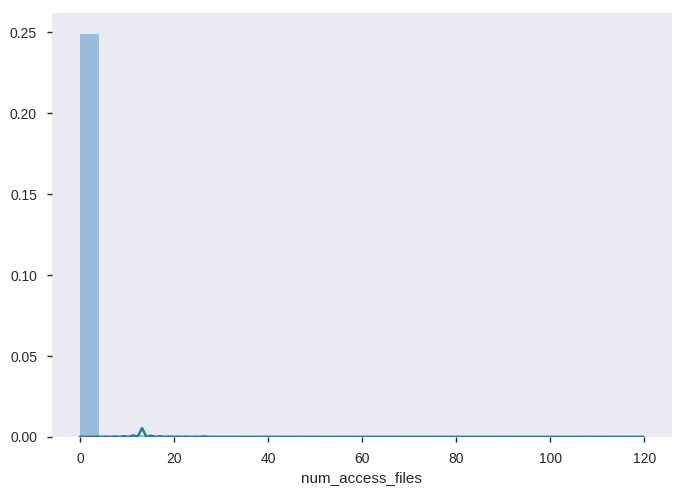

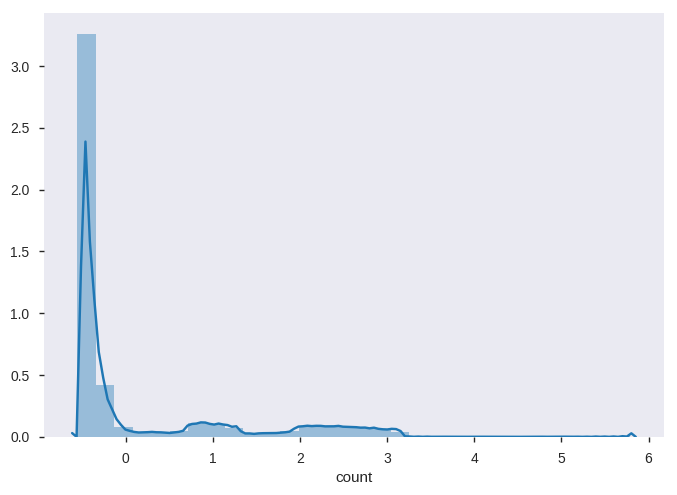

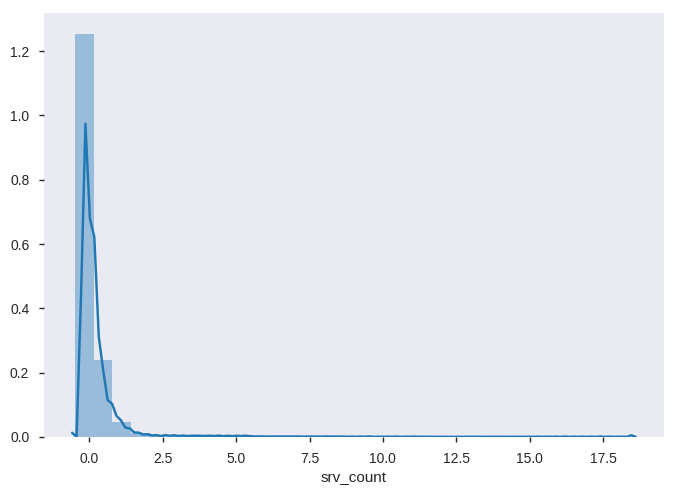

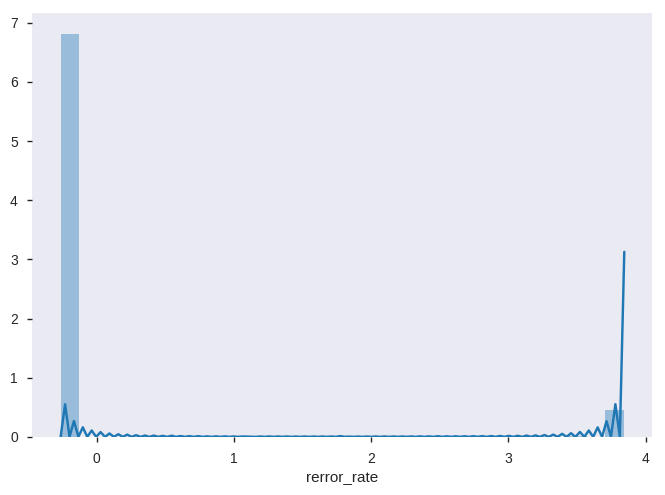

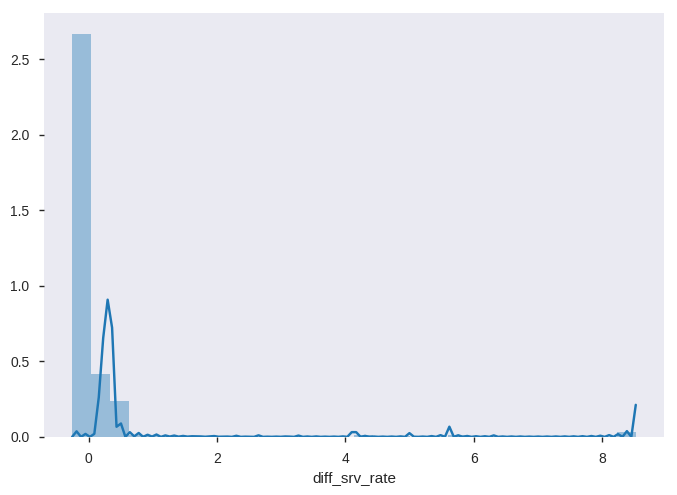

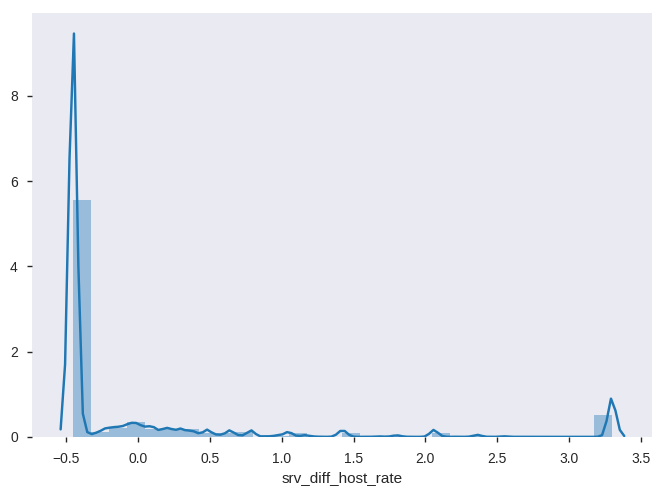

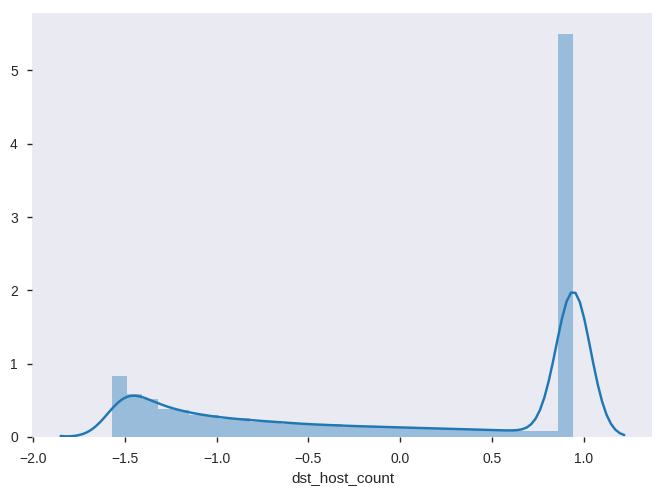

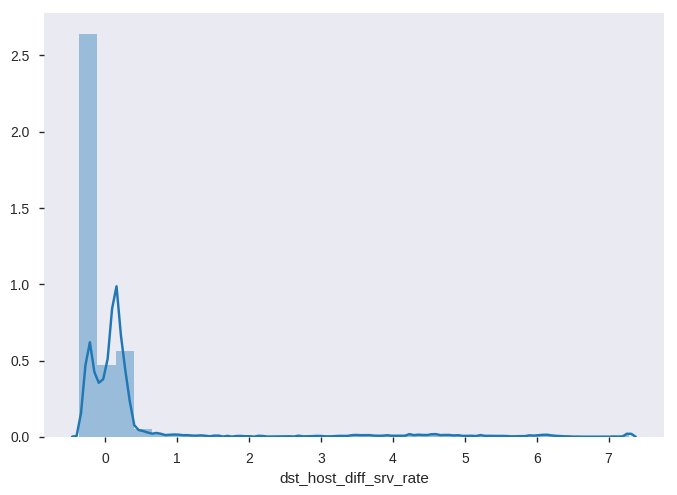

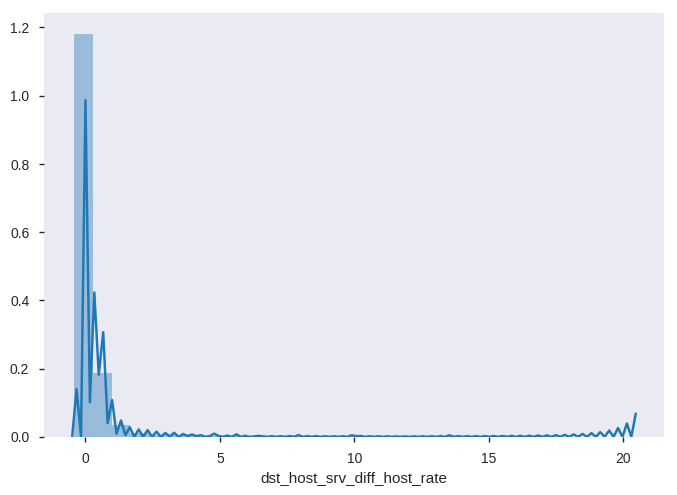

After normalize,Plot of every feature None


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,num_file_creations,num_shells,num_access_files,count,srv_count,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate
0,-0.105394,-0.243946,-0.531574,0.499127,-0.006355,0.011946,-0.005948,-0.031358,-0.003179,-0.05656,-0.008791,-0.008536,-0.019343,-0.0231,-0.019005,-0.056029,-0.540205,-0.446970,-0.263414,-0.254773,-0.455742,-1.572120,-0.367877,-0.405168
1,-0.105394,-0.243946,-0.531574,0.499127,-0.006309,-0.002923,-0.005948,-0.031358,-0.003179,-0.05656,-0.008791,-0.008536,-0.019343,-0.0231,-0.019005,-0.056029,-0.502960,-0.335447,-0.263414,-0.254773,-0.455742,-1.522790,-0.367877,-0.405168
2,-0.105394,-0.243946,-0.531574,0.499127,-0.006307,-0.002918,-0.005948,-0.031358,-0.003179,-0.05656,-0.008791,-0.008536,-0.019343,-0.0231,-0.019005,-0.056029,-0.540205,-0.446970,-0.263414,-0.254773,-0.455742,-1.453728,-0.367877,-0.405168
3,-0.105394,-0.243946,-0.531574,0.499127,-0.006313,-0.002941,-0.005948,-0.031358,-0.003179,-0.05656,-0.008791,-0.008536,-0.019343,-0.0231,-0.019005,-0.056029,-0.515375,-0.372621,-0.263414,-0.254773,-0.455742,-1.433996,-0.367877,-0.405168
4,-0.105394,-0.243946,-0.531574,0.499127,-0.006319,-0.002668,-0.005948,-0.031358,-0.003179,-0.05656,-0.008791,-0.008536,-0.019343,-0.0231,-0.019005,-0.056029,-0.502960,-0.335447,-0.263414,-0.254773,-0.455742,-1.424130,-0.367877,-0.405168


In [0]:
norma_feature =gausina_normal(my_feature)
norma_feature.head() 

In [0]:
def pca(my_df6,n):
  """n indicate no of compoenet   """
  from sklearn.decomposition import PCA
  pca = PCA(n_components= n)
  pca.fit(my_df6)
  my_df6 = pca.transform(my_df6)
  variance = pca.explained_variance_ratio_
  print('Explained variace ratio',pca.explained_variance_ratio_)
  print("Total variance:",np.sum(variance)*100)

  return my_df6

In [0]:
new_feature = pca(norma_feature,23)

Explained variace ratio [0.1215138  0.07803487 0.07079679 0.06600288 0.04915503 0.04458922
 0.04242024 0.04226282 0.04171451 0.04168054 0.04167226 0.04155784
 0.0412688  0.04102642 0.03760923 0.03581169 0.03349229 0.03079535
 0.02413206 0.02143883 0.02035911 0.0157408  0.0139236 ]
Total variance: 99.6998988166416


In [0]:
norma_feature.shape

(197852, 24)

In [0]:
new_feature

array([[-1.36437532, -0.14728598,  0.06077989, ..., -0.29704028,
         0.37955274, -0.257615  ],
       [-1.32990624, -0.15305317,  0.03898448, ..., -0.29969511,
         0.35172639, -0.2508346 ],
       [-1.32266049, -0.13726111,  0.04660964, ..., -0.27354382,
         0.34629092, -0.24570049],
       ...,
       [-1.53064215, -0.34020667,  0.14223773, ..., -0.13731665,
         0.19419645, -0.06439242],
       [-1.60649059, -0.34719064,  0.10439821, ..., -0.22969165,
         0.071041  , -0.00647325],
       [-1.5202913 , -0.3153026 ,  0.21808801, ..., -0.10507214,
         0.33147746, -0.02140772]])

In [0]:
def numric_labels(target):
  df = target
  df['label'] = df['label'].astype('category')
  cat_columns = df.select_dtypes(['category']).columns
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
  return  df

In [0]:
y_num =numric_labels(target)
y_num.shape

(197852, 1)

## Fit the Models

In [0]:
def train_test_Split(new_feature, target =my_df6.iloc[0:,24:25]):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(new_feature, target, test_size=0.20, random_state=42)
  return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test = train_test_Split(new_feature, target =my_df6.iloc[0:,24:25].values)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((158281, 23), (39571, 23), (158281, 1), (39571, 1))

In [0]:
def Suport_vector_Machine(X_train,y_tarin,X_test,kernals='rbf', c_values=2):
  from sklearn.svm import SVC
  clf = SVC(kernel =kernals,max_iter= 3000,C = c_values)
  clf.fit(X_train,y_train)
  prediction = clf.predict(X_test)
  support_vec = clf.support_vectors_
  
  return prediction, support_vec

In [0]:
# result at c= 5
pre_test1, sup_vec =Suport_vector_Machine(X_train,y_train,X_test,kernals='rbf', c_values =5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
def cla_rport(y_test,pre_test1):
  from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
  label =list(np.unique(my_df6.iloc[0:,24:25]))
  #cm = confusion_matrix(y_test,pre_test1,labels= label)
  print("Accurscy",accuracy_score(y_test,pre_test1)*100)
  #sn.heatmap(cm)
  #plt.show()
  print(classification_report(y_test, pre_test1, labels= label))

In [0]:
cla_rport(y_test,pre_test1)

Accurscy 99.82057567410477


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                  precision    recall  f1-score   support

           back.       1.00      0.98      0.99        44
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       1.00      1.00      1.00         2
           imap.       0.00      0.00      0.00         1
        ipsweep.       0.99      0.92      0.95        83
           land.       0.00      0.00      0.00         0
     loadmodule.       0.00      0.00      0.00         0
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00      7898
           nmap.       1.00      0.86      0.93        59
         normal.       1.00      1.00      1.00     30982
           perl.       0.00      0.00      0.00         0
            phf.       0.00      0.00      0.00         0
            pod.       1.00      1.00      1.00         6
      portsweep.       0.97      0.95      0.96       149
        rootk

In [0]:
# result at c= 2
pre_test1_2, sup_vec_2 =Suport_vector_Machine(X_train,y_train,X_test,kernals='rbf', c_values =2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
cla_rport(y_test,pre_test1_2)

Accurscy 99.77508781683557


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                  precision    recall  f1-score   support

           back.       0.98      0.93      0.95        44
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       1.00      1.00      1.00         2
           imap.       0.00      0.00      0.00         1
        ipsweep.       0.99      0.88      0.93        83
           land.       0.00      0.00      0.00         0
     loadmodule.       0.00      0.00      0.00         0
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00      7898
           nmap.       1.00      0.85      0.92        59
         normal.       1.00      1.00      1.00     30982
           perl.       0.00      0.00      0.00         0
            phf.       0.00      0.00      0.00         0
            pod.       1.00      1.00      1.00         6
      portsweep.       0.97      0.93      0.95       149
        rootk

In [0]:
# result at c= 1
pre_test1_1, sup_vec_2 =Suport_vector_Machine(X_train,y_train,X_test,kernals='rbf', c_values =1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print("Report of classification",cla_rport(y_test,pre_test1_1))

Accurscy 99.76750650729069


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                  precision    recall  f1-score   support

           back.       0.98      0.91      0.94        44
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       1.00      1.00      1.00         2
           imap.       0.00      0.00      0.00         1
        ipsweep.       0.99      0.86      0.92        83
           land.       0.00      0.00      0.00         0
     loadmodule.       0.00      0.00      0.00         0
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00      7898
           nmap.       1.00      0.81      0.90        59
         normal.       1.00      1.00      1.00     30982
           perl.       0.00      0.00      0.00         0
            phf.       0.00      0.00      0.00         0
            pod.       1.00      1.00      1.00         6
      portsweep.       0.99      0.93      0.96       149
        rootk

In [0]:
# result at c= 0.1
pre_test1_0_1, sup_vec_0_1 =Suport_vector_Machine(X_train,y_train,X_test,kernals='rbf', c_values =0.1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
cla_rport(y_test,pre_test1_0_1)

Accurscy 99.38591392686563


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00        44
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       0.00      0.00      0.00         2
           imap.       0.00      0.00      0.00         1
        ipsweep.       1.00      0.73      0.85        83
           land.       0.00      0.00      0.00         0
     loadmodule.       0.00      0.00      0.00         0
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00      7898
           nmap.       1.00      0.66      0.80        59
         normal.       0.99      1.00      1.00     30982
           perl.       0.00      0.00      0.00         0
            phf.       0.00      0.00      0.00         0
            pod.       1.00      1.00      1.00         6
      portsweep.       0.94      0.82      0.87       149
        rootk

In [0]:
# result at c= 0.2
pre_test1_0_2, sup_vec_0_1 =Suport_vector_Machine(X_train,y_train,X_test,kernals='rbf', c_values =0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
cla_rport(y_test,pre_test1_0_2)

Accurscy 99.58808218139546


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00        44
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       1.00      1.00      1.00         2
           imap.       0.00      0.00      0.00         1
        ipsweep.       1.00      0.84      0.92        83
           land.       0.00      0.00      0.00         0
     loadmodule.       0.00      0.00      0.00         0
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00      7898
           nmap.       1.00      0.66      0.80        59
         normal.       1.00      1.00      1.00     30982
           perl.       0.00      0.00      0.00         0
            phf.       0.00      0.00      0.00         0
            pod.       1.00      1.00      1.00         6
      portsweep.       0.99      0.87      0.93       149
        rootk

In [0]:
# result at c= 0.2
pre_test1_0_5, sup_vec_0_5 =Suport_vector_Machine(X_train,y_train,X_test,kernals='rbf', c_values =0.5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
cla_rport(y_test,pre_test1_0_5)

Accurscy 99.58808218139546


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                  precision    recall  f1-score   support

           back.       0.00      0.00      0.00        44
buffer_overflow.       0.00      0.00      0.00         1
      ftp_write.       0.00      0.00      0.00         0
   guess_passwd.       1.00      1.00      1.00         2
           imap.       0.00      0.00      0.00         1
        ipsweep.       1.00      0.84      0.92        83
           land.       0.00      0.00      0.00         0
     loadmodule.       0.00      0.00      0.00         0
       multihop.       0.00      0.00      0.00         1
        neptune.       1.00      1.00      1.00      7898
           nmap.       1.00      0.66      0.80        59
         normal.       1.00      1.00      1.00     30982
           perl.       0.00      0.00      0.00         0
            phf.       0.00      0.00      0.00         0
            pod.       1.00      1.00      1.00         6
      portsweep.       0.99      0.87      0.93       149
        rootk

In [0]:
# Visualising the Test set results
from sklearn.svm import SVC
clf = SVC(kernel ='rbf',max_iter= 3000,C = 5)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
support_vec = clf.support_vectors_
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 2].min() - 1, stop = X_set[:, 2].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 3].min() - 1, stop = X_set[:, 3].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 4].min() - 1, stop = X_set[:, 4].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 5].min() - 1, stop = X_set[:, 5].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 6].min() - 1, stop = X_set[:, 6].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 7].min() - 1, stop = X_set[:, 7].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 8].min() - 1, stop = X_set[:, 8].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 9].min() - 1, stop = X_set[:, 9].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 10].min() - 1, stop = X_set[:, 10].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 11].min() - 1, stop = X_set[:, 11].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 12].min() - 1, stop = X_set[:, 12].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 13].min() - 1, stop = X_set[:, 13].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 14].min() - 1, stop = X_set[:, 14].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 15].min() - 1, stop = X_set[:, 15].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 16].min() - 1, stop = X_set[:, 16].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 17].min() - 1, stop = X_set[:, 17].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 18].min() - 1, stop = X_set[:, 18].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 19].min() - 1, stop = X_set[:, 19].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 20].min() - 1, stop = X_set[:, 20].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 21].min() - 1, stop = X_set[:, 21].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 22].min() - 1, stop = X_set[:, 22].max() + 1, step = 0.01),)

plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('w', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('brown', 'y'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('feature')
plt.ylabel('Estimated Attack')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: ignored